In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [2]:
data = pd.read_csv("/Users/joudsi/Desktop/MyData.csv")

In [3]:
data.head(2)

,Unnamed: 0,admission_age,gender,dod,admission_type,curr_service,thirty_day_mort,hr,map,sbp,...,na,cl,bicarb,hct,wbc,glucose,mg,ca,p,lactate
0,1,76.5268,M,2102-06-14 00:00:00,EMERGENCY,MED,Y,95.0,36.7,16,...,208.0,1.7,227.0,33.0,4.6,1.5,2.0,140,3.2,12.0
1,2,76.5268,M,2102-06-14 00:00:00,EMERGENCY,MED,Y,95.0,36.7,16,...,208.0,1.7,227.0,33.0,4.6,1.5,2.0,140,3.2,12.0


In [4]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '105101')


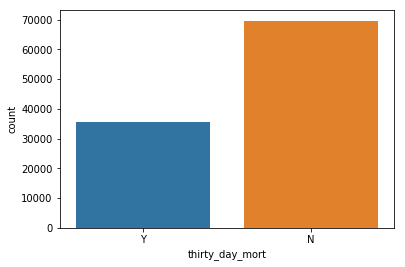

In [5]:
sns.countplot(x="thirty_day_mort", data=data)

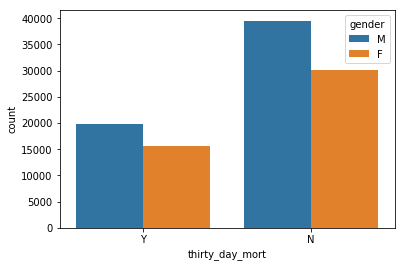

In [6]:
sns.countplot(x="thirty_day_mort", hue="gender",data=data)

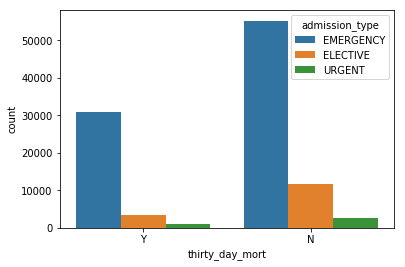

In [7]:
sns.countplot(x="thirty_day_mort", hue="admission_type",data=data)

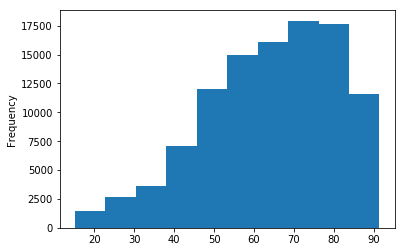

In [8]:
data["admission_age"].plot.hist()

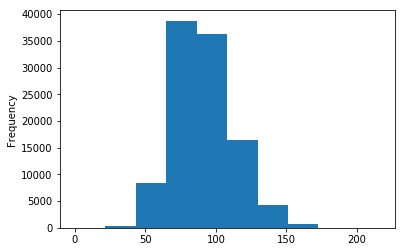

In [9]:
data["hr"].plot.hist()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105101 entries, 0 to 105100
Data columns (total 25 columns):
Unnamed: 0         105101 non-null int64
admission_age      105101 non-null float64
gender             105101 non-null object
dod                62010 non-null object
admission_type     105101 non-null object
curr_service       105101 non-null object
thirty_day_mort    105101 non-null object
hr                 105101 non-null float64
map                105101 non-null float64
sbp                105101 non-null int64
temp               105101 non-null int64
spo2               105101 non-null float64
rr                 105101 non-null float64
cr                 105101 non-null int64
k                  105101 non-null float64
na                 105101 non-null float64
cl                 105101 non-null float64
bicarb             105101 non-null float64
hct                105101 non-null float64
wbc                105101 non-null float64
glucose            105101 non-null float64


In [11]:
data.drop(['gender', 'dod', 'admission_type', 'curr_service' ] , axis=1, inplace=True)

In [12]:
X = data.drop("thirty_day_mort", axis=1)
Y = data["thirty_day_mort"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression()

In [17]:
logmodel.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = logmodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           N       0.71      0.91      0.80     20800\n           Y       0.60      0.26      0.37     10731\n\n   micro avg       0.69      0.69      0.69     31531\n   macro avg       0.66      0.59      0.58     31531\nweighted avg       0.67      0.69      0.65     31531\n'

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_test, predictions)

array([[18950,  1850],
       [ 7900,  2831]])

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, predictions)

0.6907805017284577